In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import preprocessing
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif #ukur dependensi variabel kategorik
from sklearn.feature_selection import mutual_info_regression #ukur dependensi variabel numerik

In [2]:
import chardet

with open('customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
df = pd.read_csv('customer_booking.csv', encoding= 'ISO-8859-1')
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Ubah format data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
print('cek jumlah nilai di kolom')
print(f'rute:', df['route'].nunique())
print(f'sales_channel:', df['sales_channel'].nunique())
print(f'rute:', df['trip_type'].nunique())
print(f'booking:', df['booking_complete'].nunique())
print(f'hour:', df['flight_hour'].nunique())

cek jumlah nilai di kolom
rute: 799
sales_channel: 2
rute: 3
booking: 2
hour: 24


# EDA

In [6]:
df2 = df.reset_index()
df2.head(2)

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0


## Booking Status Distribution

In [7]:
colors = plt.cm.tab10.colors

In [8]:
status_counts = df['booking_complete'].value_counts()

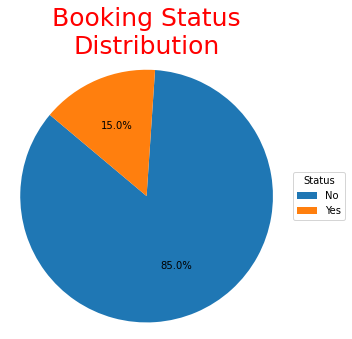

In [9]:
# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Booking Status\nDistribution", fontsize = 25, color = 'Red')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran penuh
plt.legend(title="Status", labels=['No', 'Yes'], loc="center right", bbox_to_anchor = (1.23,0.5))

plt.show()

## Booking Origin Distribution

In [10]:
orivalcount = df['booking_origin'].value_counts().reset_index()
orivalcount

,index,booking_origin
0,Australia,17872
1,Malaysia,7174
2,South Korea,4559
3,Japan,3885
4,China,3387
...,...,...
99,Panama,1
100,Tonga,1
101,Tanzania,1
102,Bulgaria,1


In [11]:
top_country = (df['booking_origin'].value_counts().reset_index().sort_values(by='booking_origin',ascending=False).head(10))

In [12]:
orivalcount['top_country'] = orivalcount['index'].apply(lambda x: x if (x in top_country['index'].to_list()) else 'Others')
orivalcount.head(15)

,index,booking_origin,top_country
0,Australia,17872,Australia
1,Malaysia,7174,Malaysia
2,South Korea,4559,South Korea
3,Japan,3885,Japan
4,China,3387,China
5,Indonesia,2369,Indonesia
6,Taiwan,2077,Taiwan
7,Thailand,2030,Thailand
8,India,1270,India
9,New Zealand,1074,New Zealand


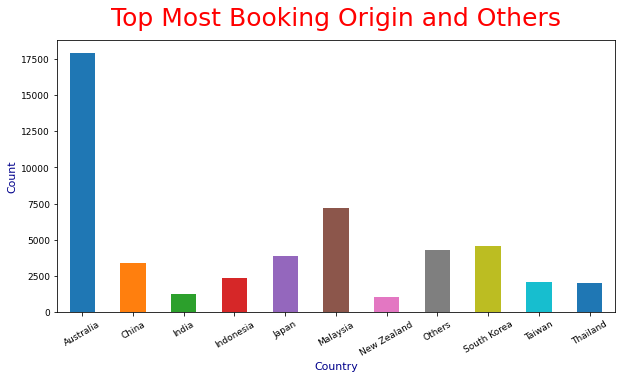

In [13]:
orivalcount.groupby(['top_country'])['booking_origin'].sum().plot(kind = 'bar', figsize = (10,5), color = colors)
plt.title('Top Most Booking Origin and Others', color = 'red', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 11, color = 'darkblue')
plt.ylabel('Count', fontsize = 11, color = 'darkblue')
plt.ylim(ymin = 0)
plt.xticks(fontsize = 9, rotation = 30)
plt.yticks(fontsize = 9)
plt.show()

## Number of Passanger Each Origin Distribution

In [14]:
top_pass = (df2.groupby(['booking_origin'])['index'].sum().reset_index().sort_values(by='booking_origin',ascending=False).head(5))
top_pass

,booking_origin,index
103,Vietnam,9410899
102,Vanuatu,31556
101,United States,12394567
100,United Kingdom,3985433
99,United Arab Emirates,934132


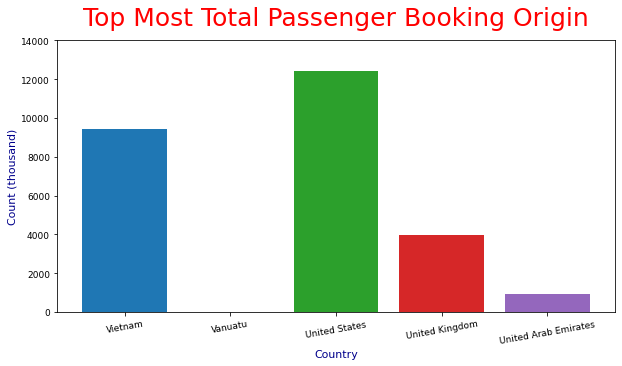

In [15]:
plt.figure(figsize = (10,5))
plt.bar(top_pass['booking_origin'], top_pass['index'], color = colors)
plt.title('Top Most Total Passenger Booking Origin', color = 'red', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 11, color = 'darkblue')
plt.ylabel('Count (thousand)', fontsize = 11, color = 'darkblue')
plt.ylim(ymin = 0)
plt.xticks(fontsize = 9, rotation = 10)
ytick_label, location = plt.yticks()
plt.yticks(ytick_label, (ytick_label/1000).astype('int'), fontsize = 9)
plt.show()

## Relation between Booking Complete and ...

### Flight Duration

In [16]:
dfgroup1 = df.groupby(['booking_complete'])['flight_duration'].mean()
dfgroup1

booking_complete
0    7.344266
1    6.898258
Name: flight_duration, dtype: float64

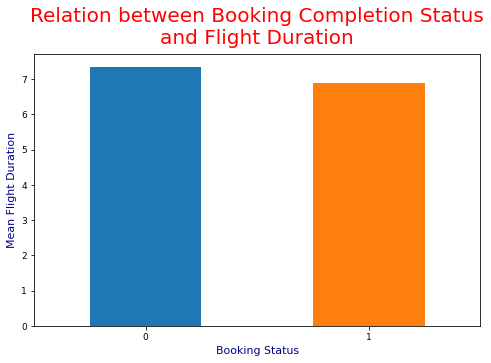

In [17]:
dfgroup1.plot(kind = 'bar', figsize = (8,5), color = colors)
plt.title('Relation between Booking Completion Status\nand Flight Duration', fontsize = 20, color = 'red', pad = 10)
plt.xlabel('Booking Status', fontsize = 11, color = 'darkblue')
plt.ylabel('Mean Flight Duration', fontsize = 11, color = 'darkblue')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9, rotation = 0)
plt.show()

### Length of Stay

In [18]:
dfgroup2 = df.groupby(['booking_complete'])['length_of_stay'].mean()
dfgroup2

booking_complete
0    23.647218
1    19.617679
Name: length_of_stay, dtype: float64

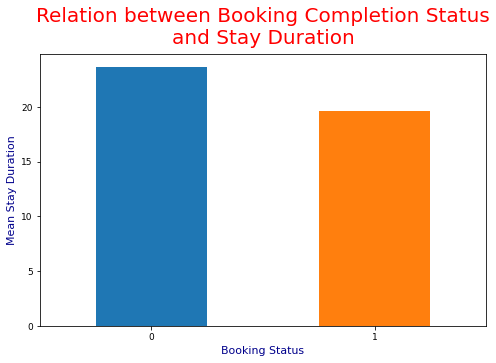

In [19]:
dfgroup2.plot(kind = 'bar', figsize = (8,5), color = colors)
plt.title('Relation between Booking Completion Status\nand Stay Duration', fontsize = 20, color = 'red', pad = 10)
plt.xlabel('Booking Status', fontsize = 11, color = 'darkblue')
plt.ylabel('Mean Stay Duration', fontsize = 11, color = 'darkblue')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9, rotation = 0)
plt.show()

### Purchase Lead

In [20]:
dfgroup3 = df.groupby(['booking_complete'])['purchase_lead'].mean()
dfgroup3

booking_complete
0    85.779926
1    80.167157
Name: purchase_lead, dtype: float64

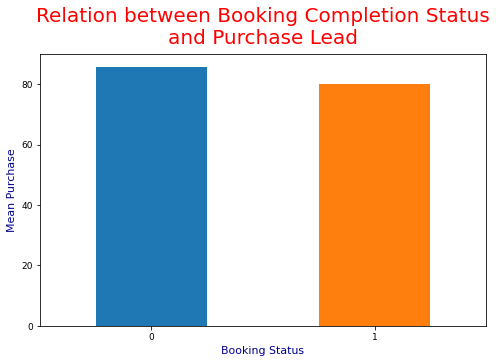

In [21]:
dfgroup3.plot(kind = 'bar', figsize = (8,5), color = colors)
plt.title('Relation between Booking Completion Status\nand Purchase Lead', fontsize = 20, color = 'red', pad = 10)
plt.xlabel('Booking Status', fontsize = 11, color = 'darkblue')
plt.ylabel('Mean Purchase', fontsize = 11, color = 'darkblue')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9, rotation = 0)
plt.show()

### Sales Channel

In [22]:
dfgroup4 = df2.groupby(['booking_complete', 'sales_channel'])['index'].count().unstack()
dfgroup4

sales_channel,Internet,Mobile
booking_complete,,
0,37513,5009
1,6869,609


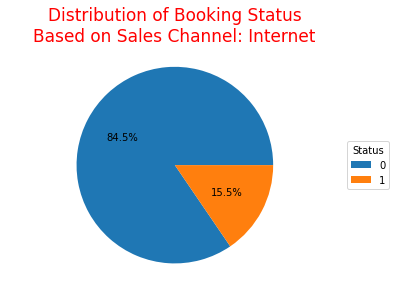

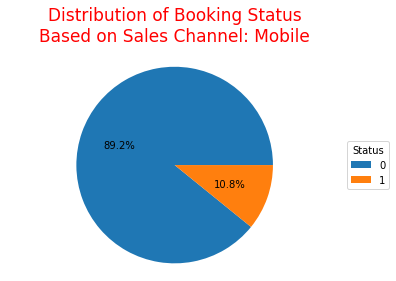

In [23]:
# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in dfgroup4.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(dfgroup4[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Distribution of Booking Status\nBased on Sales Channel: {col}', fontsize=17, pad=15, color = 'red')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               dfgroup4[col].index, 
               title='Status', 
               loc='center left', 
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

### Trip Type

In [24]:
dfgroup5 = df2.groupby(['booking_complete', 'trip_type'])['index'].count().unstack()
dfgroup5

trip_type,CircleTrip,OneWay,RoundTrip
booking_complete,,,
0,111,367,42044
1,5,20,7453


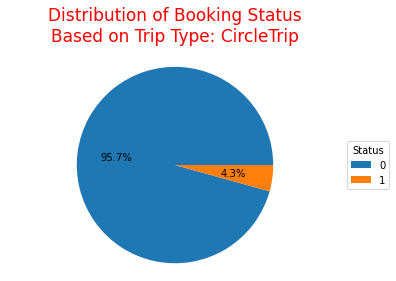

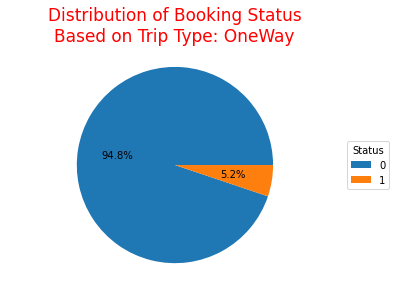

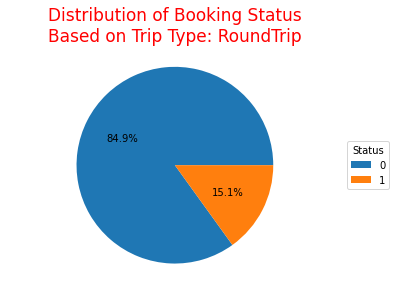

In [25]:
# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in dfgroup5.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(dfgroup5[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Distribution of Booking Status\nBased on Trip Type: {col}', fontsize=17, pad=15, color = 'red')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               dfgroup5[col].index, 
               title='Status', 
               loc='center left', 
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

# Modeling

In [26]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [27]:
dfnew = df

In [28]:
from sklearn.preprocessing import OneHotEncoder

selected_columns = ['sales_channel', 'trip_type', 'flight_day', 'route']

encoded_columns = pd.get_dummies(dfnew[selected_columns], prefix=selected_columns, drop_first=True)

dfnew = pd.concat([dfnew, encoded_columns], axis=1)

dfnew.drop(columns=selected_columns, inplace=True)
dfnew.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'route_TGGXIY', 'route_TPETRZ', 'route_TPETWU', 'route_TPEURT',
       'route_TPEVTE', 'route_TRZWUH', 'route_TRZXIY', 'route_TWUWUH',
       'route_TWUXIY', 'route_URTXIY'],
      dtype='object', length=817)

drop booking_origin as a variable to this model untuk menghindari ketidakseimbangan data

In [29]:
x = dfnew.drop(columns = ['booking_complete', 'booking_origin'], axis =1)
y = dfnew['booking_complete']
x

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,route_TGGXIY,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY
0,2,262,19,7,1,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
#persiapan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

## Tanpa SMOTE

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [33]:
#validasi
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.39


In [34]:
eval_classification(rf_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.10
F1-Score (Test Set): 0.16
roc_auc (test-proba): 0.74
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999999660496044
roc_auc (crossval test): 0.732881369723129


Jika nilai recall train dan test memiliki perbedaan yang signifikan, diperkirakan terjadi overfitting. sehingga perlu dilakukan hyperparameter tuning nantinya.

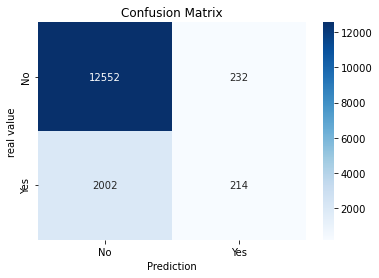

In [35]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('real value')
plt.title('Confusion Matrix')
plt.show()

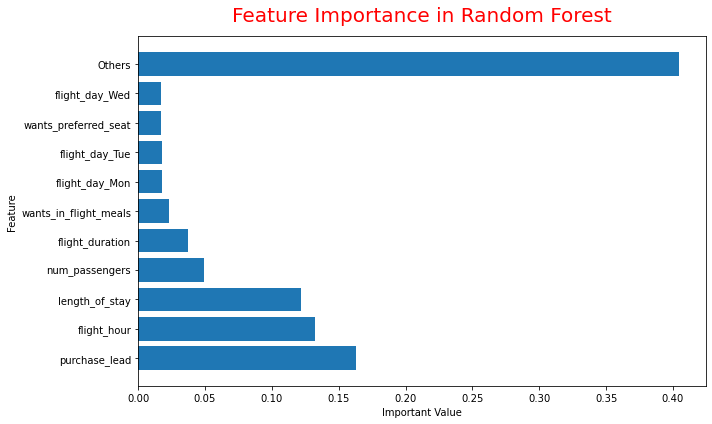

In [36]:
# Dapatkan fitur-fitur penting dari model
feature_importances = rf_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Important Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest',  pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

### Decision Tree

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [39]:
#validasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.46


In [40]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.79
Precision (Test Set): 0.28
Recall (Test Set): 0.27
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.58
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999999700441592
roc_auc (crossval test): 0.5691120879719209


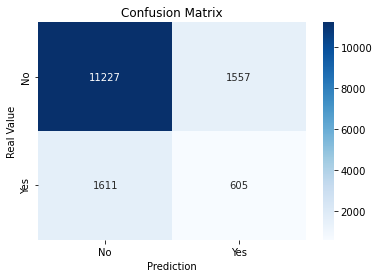

In [41]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

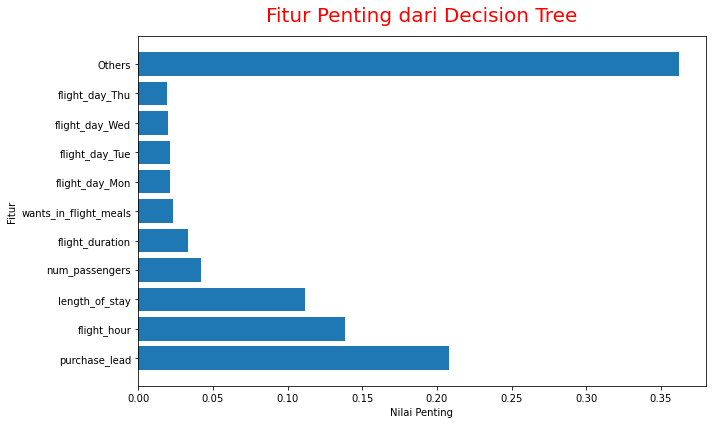

In [42]:
# Dapatkan fitur-fitur penting dari model
feature_importances = dt_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('Fitur Penting dari Decision Tree', pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

### XGBoost

In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier

In [45]:
# Buat model XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [46]:
#validasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.39


In [47]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.79
Precision (Test Set): 0.28
Recall (Test Set): 0.27
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.58
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999999700441592
roc_auc (crossval test): 0.5691120879719209


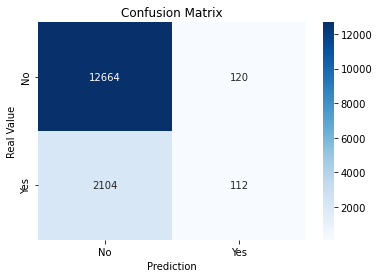

In [48]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

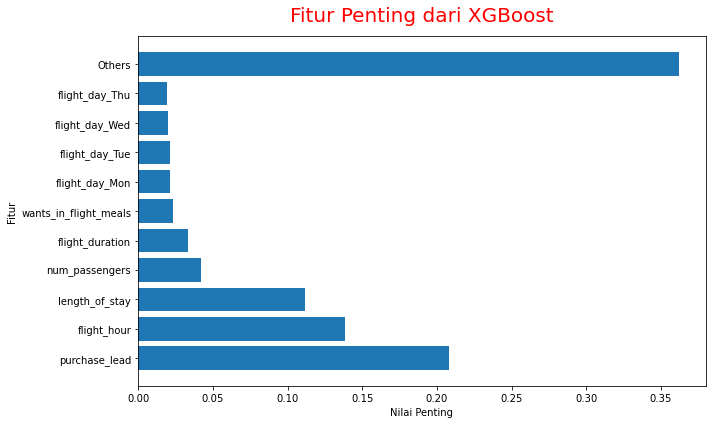

In [49]:
# Dapatkan fitur-fitur penting dari model
feature_importances = dt_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('Fitur Penting dari XGBoost', pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

## Dengan SMOTE

In [50]:
!pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = smt.fit_resample(x, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

### Random Forest

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [54]:
#validasi
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.35


In [55]:
eval_classification(rf_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.88
Precision (Test Set): 0.89
Recall (Test Set): 0.87
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999998620830283
roc_auc (crossval test): 0.9417517044847481


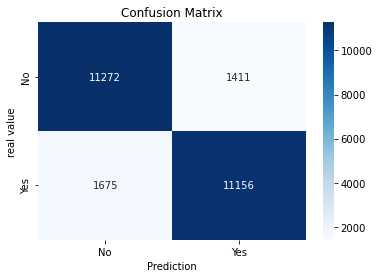

In [56]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('real value')
plt.title('Confusion Matrix')
plt.show()

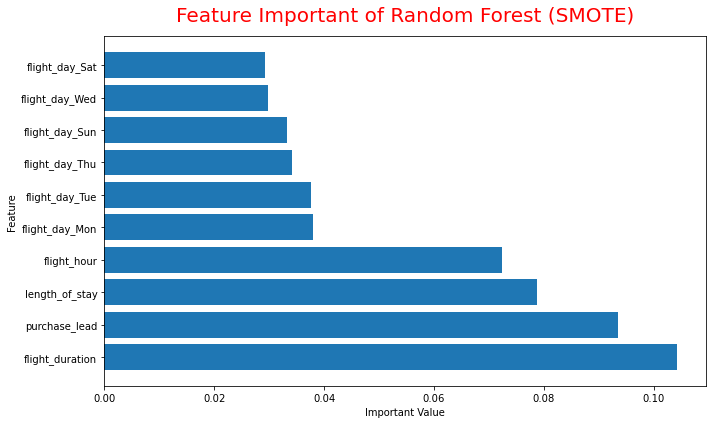

In [74]:
# Dapatkan fitur-fitur penting dari model
feature_importances = rf_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), [feature_importances[idx] for idx in sorted_indices[:top_n]])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Important Value')
plt.ylabel('Feature')
plt.title('Feature Important of Random Forest (SMOTE)', pad=15, fontsize=20, color='red')
plt.tight_layout()
plt.show()

### Decision Tree

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [77]:
#validasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.39


In [78]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.85
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.999999998236356
roc_auc (crossval test): 0.8450059186727351


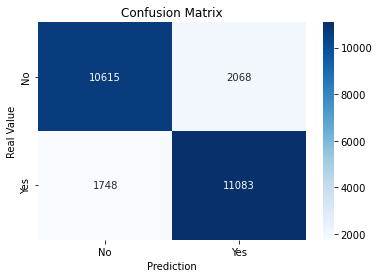

In [79]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

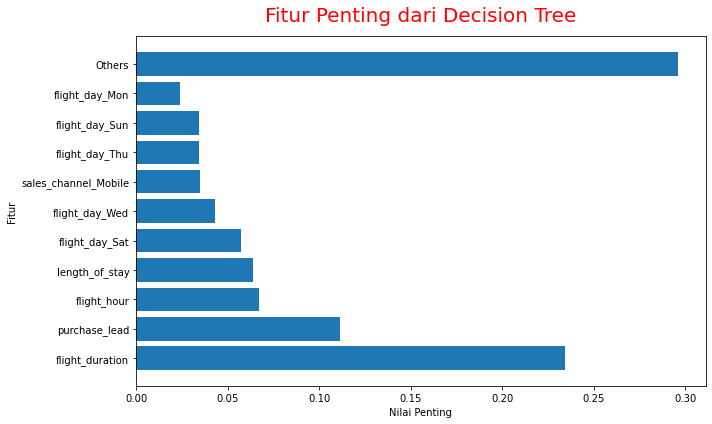

In [80]:
# Dapatkan fitur-fitur penting dari model
feature_importances = dt_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('Fitur Penting dari Decision Tree', pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()

### XGBoost

In [81]:
# Buat model XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [82]:
#validasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.38


In [83]:
eval_classification(dt_model)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.85
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.999999998236356
roc_auc (crossval test): 0.8450059186727351


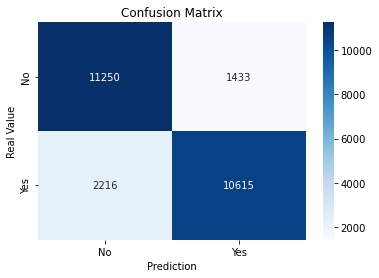

In [84]:
# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

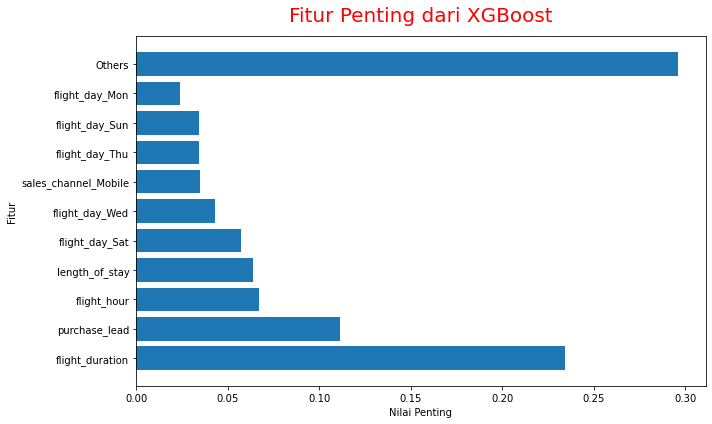

In [85]:
# Dapatkan fitur-fitur penting dari model
feature_importances = dt_model.feature_importances_

# Urutkan fitur-fitur penting dalam urutan menurun
sorted_indices = feature_importances.argsort()[::-1]

top_n = 10

# Tampilkan fitur-fitur penting
top_features = [x.columns[idx] for idx in sorted_indices[:top_n]]
other_features = [x.columns[idx] for idx in sorted_indices[top_n:]]

# Menggabungkan "Others" untuk fitur yang tidak termasuk dalam top 10
feature_labels = top_features + ['Others']
feature_importances = [feature_importances[idx] for idx in sorted_indices[:top_n]] + [sum(feature_importances[idx] for idx in sorted_indices[top_n:])]

# Visualisasikan fitur-fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_labels)), feature_importances)
plt.yticks(range(len(feature_labels)), feature_labels)
plt.xlabel('Nilai Penting')
plt.ylabel('Fitur')
plt.title('Fitur Penting dari XGBoost', pad = 15, fontsize = 20, color = 'red')
plt.tight_layout()
plt.show()